# **Stroke Prediction Using Machine Learning**

Dataset Link:- https://www.kaggle.com/code/ruthvikpvs/stroke-data-analysis-and-prediction/data

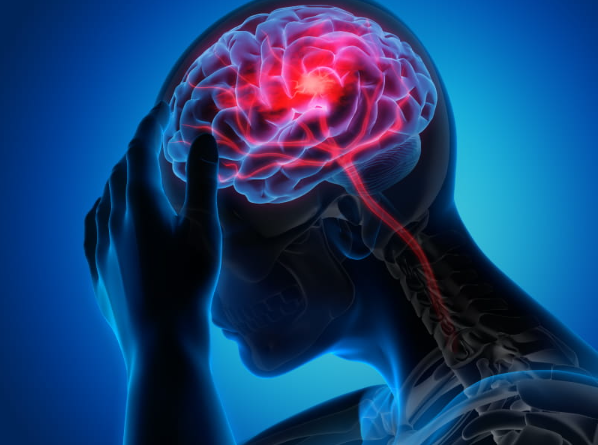

https://www.linkedin.com/feed/update/urn:li:activity:7012738264709091328/

https://www.kaggle.com/code/ahmtcnbs/stroke-prediction-xgboost-97


**Overview**

A stroke occurs when the blood supply to part of your brain is interrupted or reduced, preventing brain tissue from getting oxygen and nutrients. Brain cells begin to die in minutes.

---

A stroke is a medical emergency, and prompt treatment is crucial. Early action can reduce brain damage and other complications. Stroke Statistics In 2018, 1 in every 6 deaths from cardiovascular disease was due to stroke.1 Someone in the United States has a stroke every 40 seconds. Every 4 minutes, someone dies of stroke.2 Every year, more than 795,000 people in the United States have a stroke. About 610,000 of these are first or new strokes.2 About 185,000 strokes—nearly 1 of 4—are in people who have had a previous stroke.2 About 87% of all strokes are ischemic strokes, in which blood flow to the brain is blocked.2 Stroke-related costs in the United States came to nearly 46 billion dollars between 2014 and 2015.2 This total includes the cost of health care services, medicines to treat stroke, and missed days of work. Stroke is a leading cause of serious long-term disability.2 Stroke reduces mobility in more than half of stroke survivors age 65 and over.2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,f1_score,precision_score,recall_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
from warnings import filterwarnings
filterwarnings("ignore")

sns.set()

In [2]:
# Load the Dataset
df = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.shape

(5110, 12)

In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
df.duplicated().sum()

0

### **Separate Categorical and Numerical Features**

**1. Categorical Columns**

In [8]:
cat_col = [colm for colm in df.columns if df[colm].dtype == "O"]
cat_col

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [9]:
df[cat_col].head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


In [10]:
df[cat_col].isnull()

,gender,ever_married,work_type,Residence_type,smoking_status
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
5105,False,False,False,False,False
5106,False,False,False,False,False
5107,False,False,False,False,False
5108,False,False,False,False,False


In [11]:
df[cat_col].isnull().sum()

gender            0
ever_married      0
work_type         0
Residence_type    0
smoking_status    0
dtype: int64

In [12]:
Categorical = df[cat_col]
Categorical.head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


In [13]:
Categorical.shape

(5110, 5)

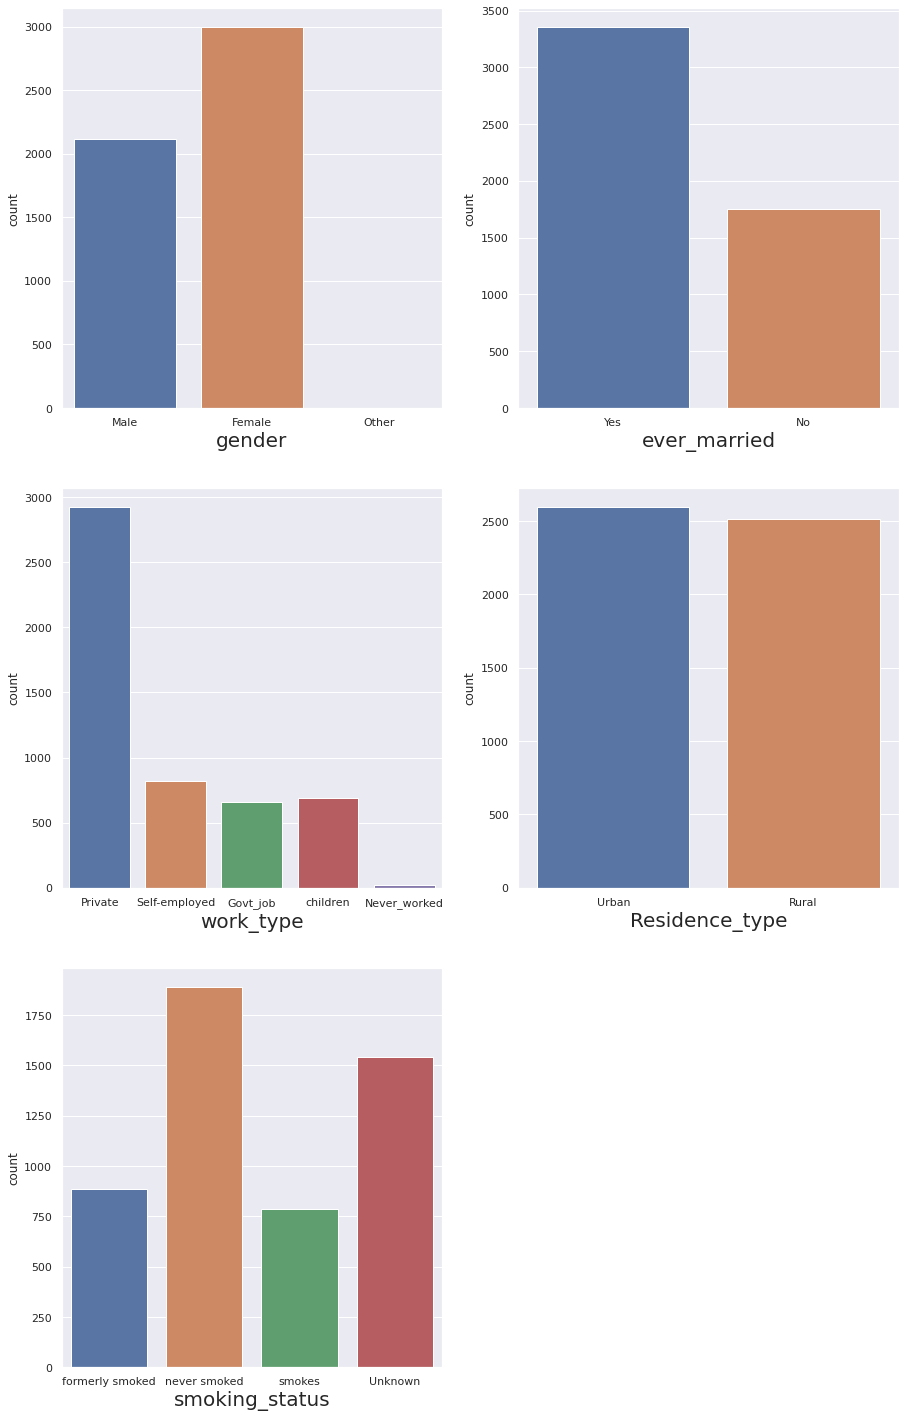

In [14]:
plt.figure(figsize=(15,25))
plotnumber = 1

for column in Categorical:
  if plotnumber <= 6:
    ax = plt.subplot(3,2,plotnumber)
    sns.countplot(Categorical[column])
    plt.xlabel(column,fontsize = 20)
  plotnumber+=1
plt.show()

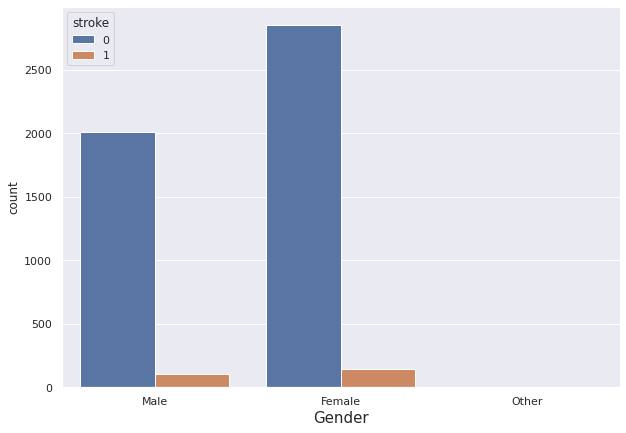

In [15]:
## Gender

plt.figure(figsize = (10,7))
sns.countplot(data=df,x='gender',hue='stroke')
plt.xlabel("Gender",fontsize = 15)
plt.show()

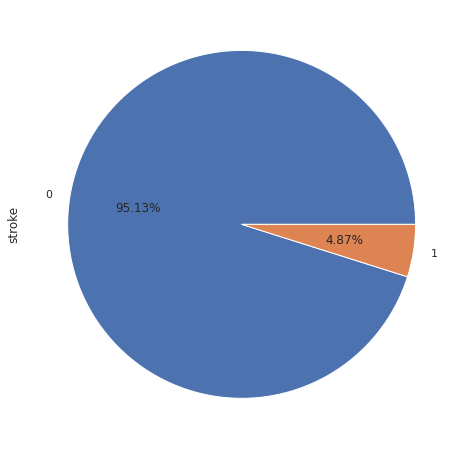

In [16]:
plt.figure(figsize=(8,8))
df['stroke'].value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.show()

In [17]:
#Ever married
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

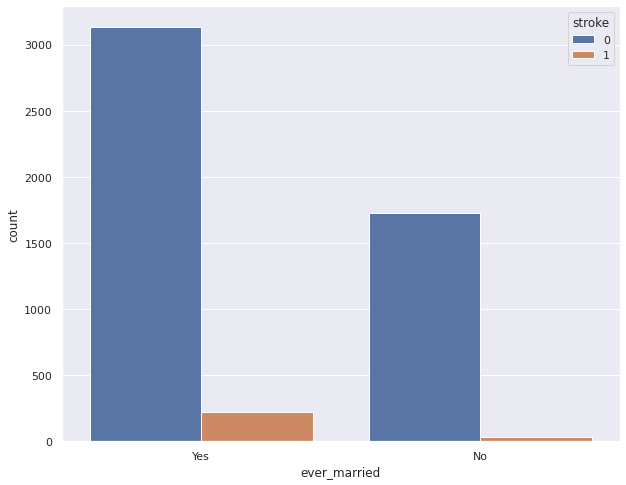

In [18]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='ever_married',hue='stroke')
plt.show()


In [19]:
## Work type

df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [20]:
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

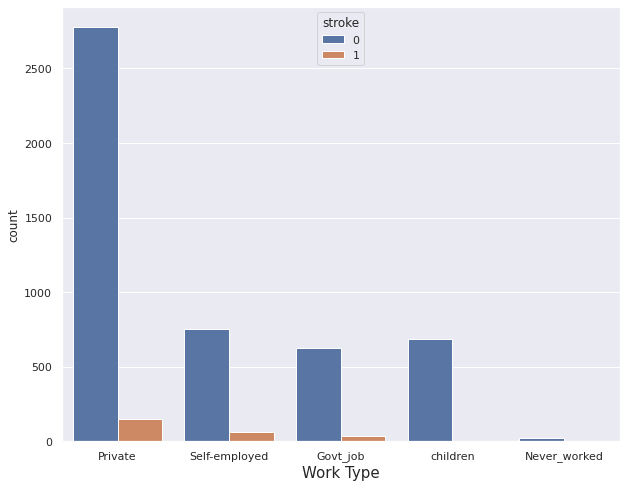

In [21]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='work_type',hue='stroke')
plt.xlabel("Work Type",fontsize = 15)
plt.show()

**Encoding the categorical variables**

In [22]:
lr = LabelEncoder

In [23]:
from sklearn.preprocessing import LabelEncoder
cols = ['gender', 'ever_married', 'work_type', 'Residence_type','smoking_status']
le = LabelEncoder()
for col in cols:
    Categorical[col] = le.fit_transform(Categorical[col])

In [24]:
Categorical.head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,1,1,2,1,1
1,0,1,3,0,2
2,1,1,2,0,2
3,0,1,2,1,3
4,0,1,3,0,2


**2. Numerical Columns**

In [25]:
Num_col = [colm for colm in df.columns if df[colm].dtype != "O" ]
Num_col

['id',
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'stroke']

In [26]:
df[Num_col].head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67.0,0,1,228.69,36.6,1
1,51676,61.0,0,0,202.21,NaN,1
2,31112,80.0,0,1,105.92,32.5,1
3,60182,49.0,0,0,171.23,34.4,1
4,1665,79.0,1,0,174.12,24.0,1


In [27]:
df[Num_col].isnull().sum()

id                     0
age                    0
hypertension           0
heart_disease          0
avg_glucose_level      0
bmi                  201
stroke                 0
dtype: int64

In [28]:
df[Num_col].shape

(5110, 7)

In [29]:
Numerical = df[Num_col]
Numerical.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67.0,0,1,228.69,36.6,1
1,51676,61.0,0,0,202.21,NaN,1
2,31112,80.0,0,1,105.92,32.5,1
3,60182,49.0,0,0,171.23,34.4,1
4,1665,79.0,1,0,174.12,24.0,1


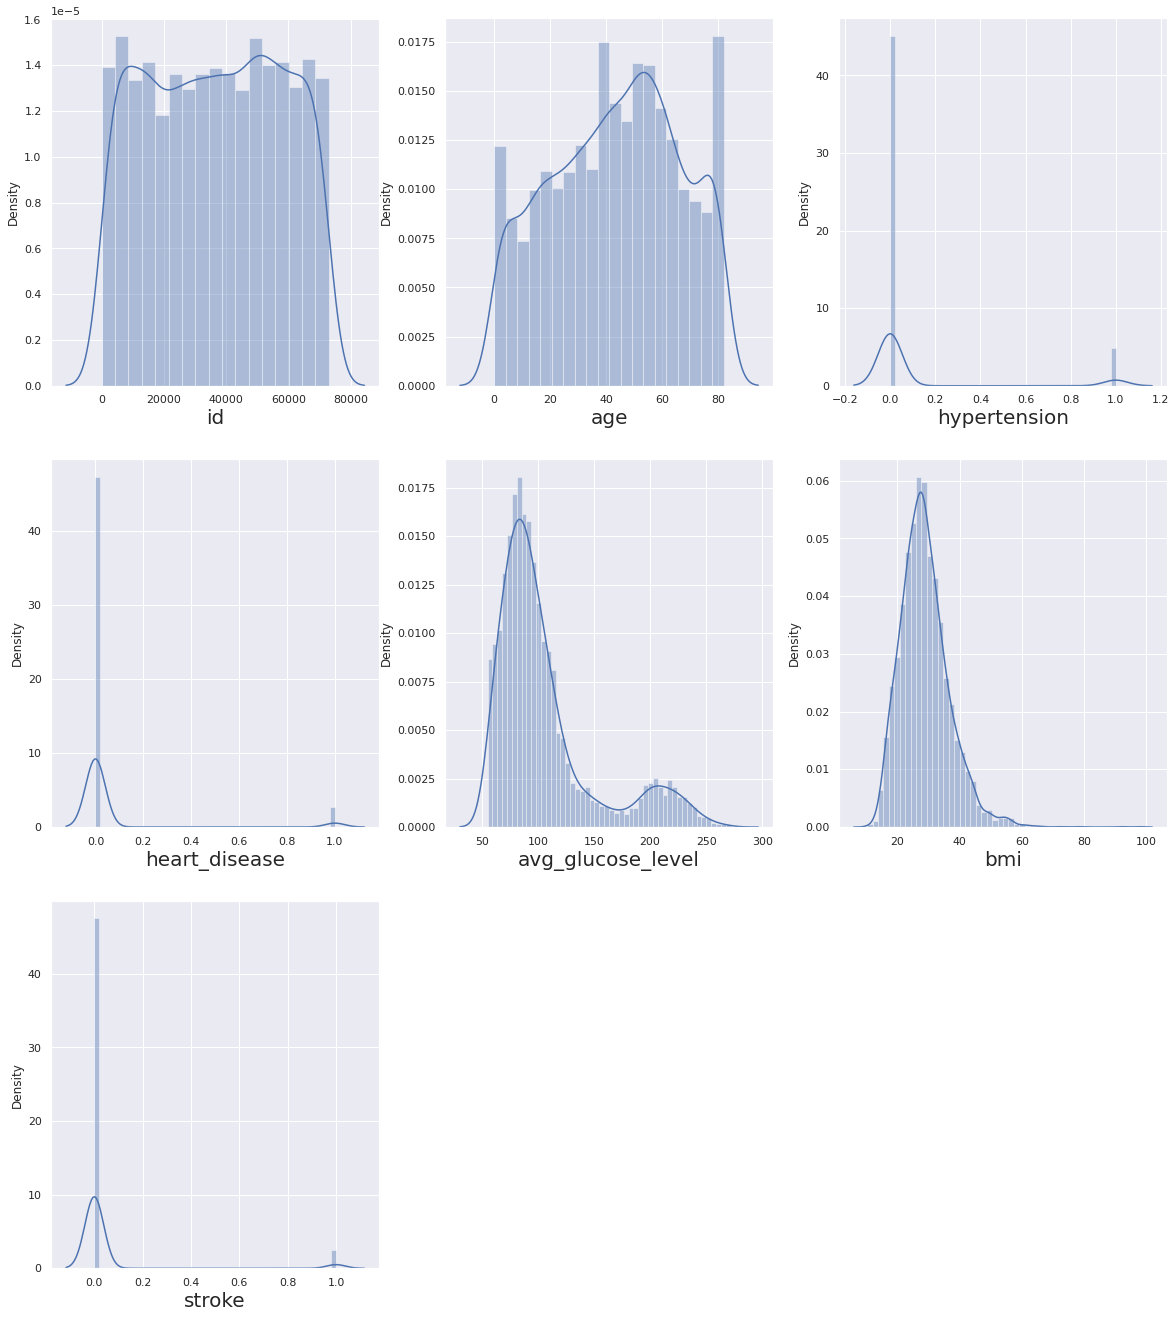

In [30]:
plt.figure(figsize=(20,23))
plotnumber = 1

for column in Numerical:
  if plotnumber <= 8:
    ax = plt.subplot(3,3,plotnumber)
    sns.distplot(Numerical[column])
    plt.xlabel(column,fontsize = 20)
  plotnumber+=1
plt.show()

filling missing values

In [31]:
Numerical.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')

In [32]:
Numerical["bmi"].isnull().sum()

201

In [33]:
Numerical["bmi"] = Numerical["bmi"].fillna(Numerical["bmi"].mean())

In [34]:
Numerical.isnull().sum()

id                   0
age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
stroke               0
dtype: int64

In [35]:
Numerical["avg_glucose_level"] = np.log(Numerical["avg_glucose_level"])
Numerical["bmi"] = np.log(Numerical["bmi"])

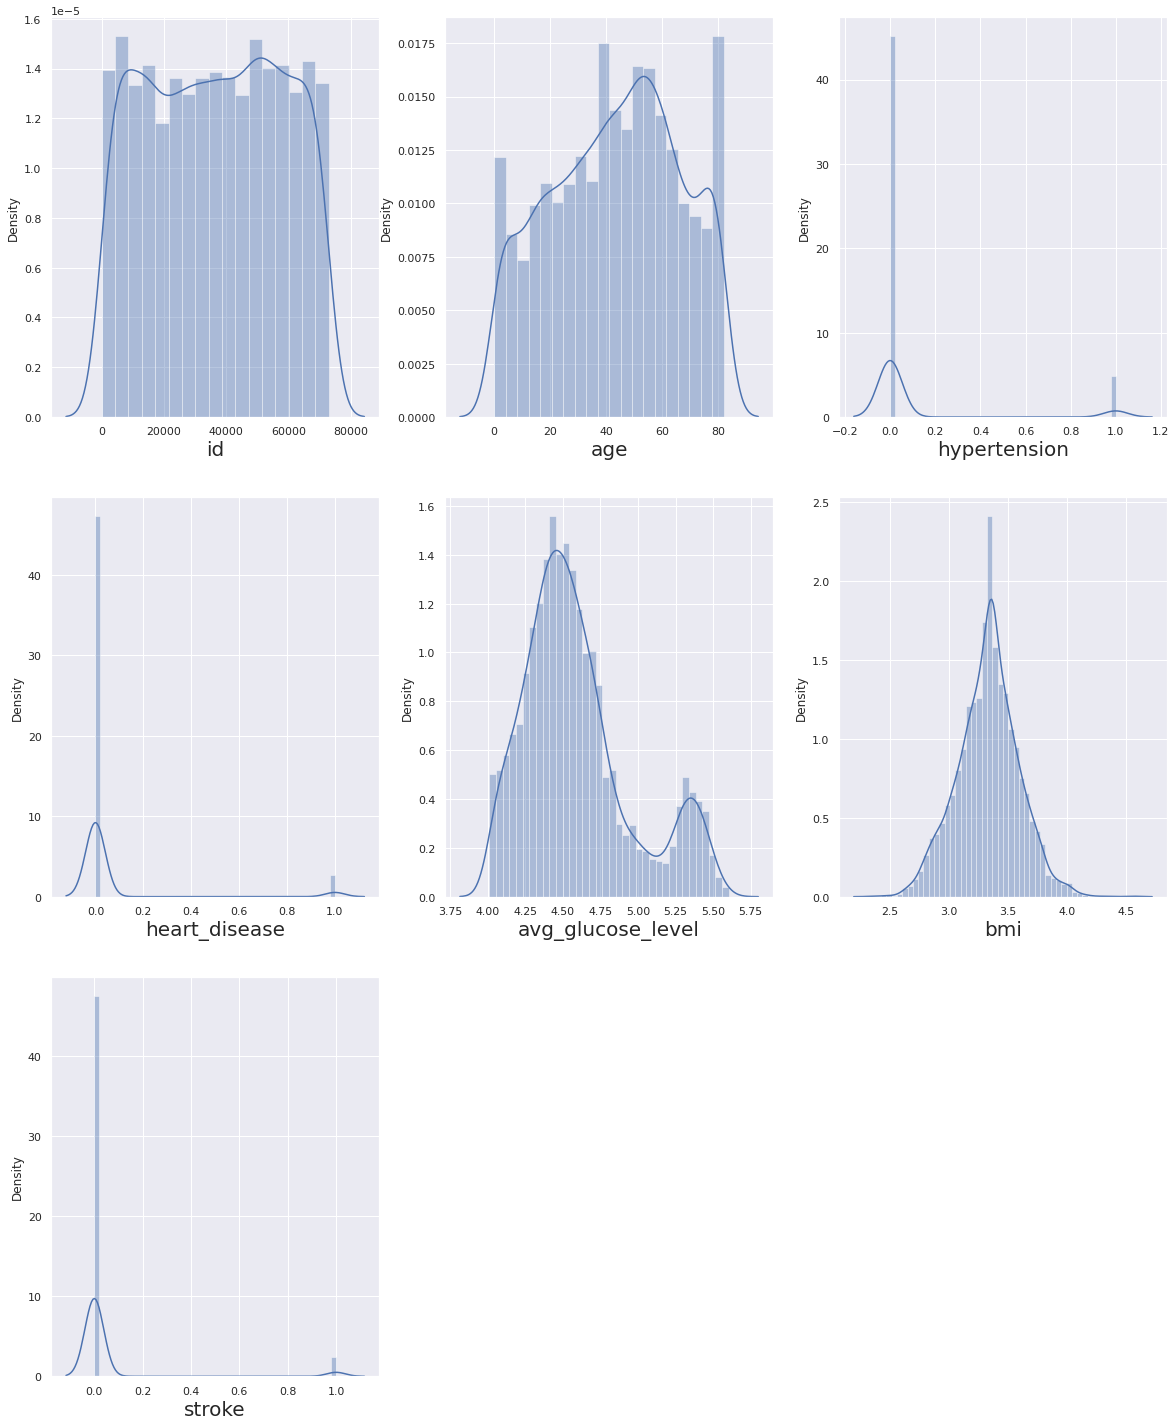

In [36]:
plt.figure(figsize=(20,25))
plotnumber = 1

for column in Numerical:
  if plotnumber <= 8:
    ax = plt.subplot(3,3,plotnumber)
    sns.distplot(Numerical[column])
    plt.xlabel(column,fontsize = 20)
  plotnumber+=1
plt.show()

In [37]:
#drop not required column
Numerical.drop(columns=["id"],inplace = True)

In [38]:
Numerical.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,5.432367,3.600048,1
1,61.0,0,0,5.309307,3.363608,1
2,80.0,0,1,4.662684,3.481240,1
3,49.0,0,0,5.143008,3.538057,1
4,79.0,1,0,5.159745,3.178054,1


In [39]:
# More men than women had strokes
df.groupby('gender').mean()[['age', 'stroke']]

,age,stroke
gender,,
Female,43.757395,0.047094
Male,42.483385,0.051064
Other,26.000000,0.000000


More men than women had stroke attack.


In [40]:
## Smoking Features

df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

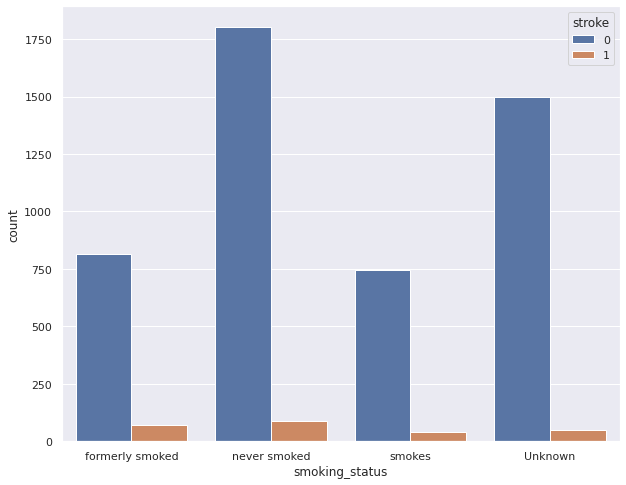

In [41]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='smoking_status',hue='stroke')
plt.show()

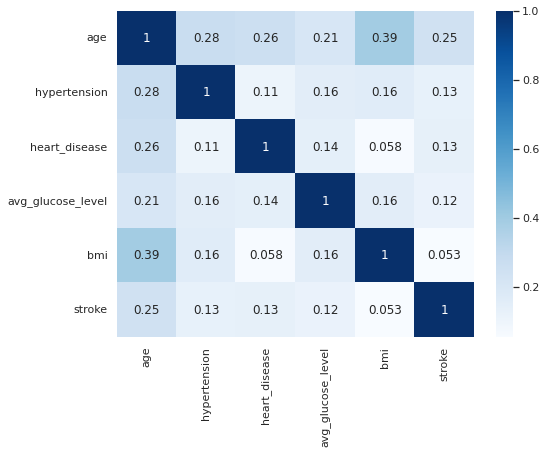

In [42]:
# constructing a heatmap to understand the correlation

plt.figure(figsize=(8,6))
sns.heatmap(Numerical.corr(), cmap='Blues',annot = True)

### **Concatenate Categorical and Numerical**

In [43]:
data = pd.concat([Categorical,Numerical],axis=1)
data.head()

,gender,ever_married,work_type,Residence_type,smoking_status,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,1,1,2,1,1,67.0,0,1,5.432367,3.600048,1
1,0,1,3,0,2,61.0,0,0,5.309307,3.363608,1
2,1,1,2,0,2,80.0,0,1,4.662684,3.481240,1
3,0,1,2,1,3,49.0,0,0,5.143008,3.538057,1
4,0,1,3,0,2,79.0,1,0,5.159745,3.178054,1


In [44]:
data.shape

(5110, 11)

In [45]:
data.describe()

,gender,ever_married,work_type,Residence_type,smoking_status,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,0.656164,2.167710,0.508023,1.376908,43.226614,0.097456,0.054012,4.592465,3.329807,0.048728
std,0.493044,0.475034,1.090293,0.499985,1.071534,22.612647,0.296607,0.226063,0.361985,0.259888,0.215320
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.080000,0.000000,0.000000,4.009513,2.332144,0.000000
25%,0.000000,0.000000,2.000000,0.000000,0.000000,25.000000,0.000000,0.000000,4.346982,3.169686,0.000000
50%,0.000000,1.000000,2.000000,1.000000,2.000000,45.000000,0.000000,0.000000,4.520538,3.346389,0.000000
75%,1.000000,1.000000,3.000000,1.000000,2.000000,61.000000,0.000000,0.000000,4.736988,3.490429,0.000000
max,2.000000,1.000000,4.000000,1.000000,3.000000,82.000000,1.000000,1.000000,5.604846,4.580877,1.000000


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   ever_married       5110 non-null   int64  
 2   work_type          5110 non-null   int64  
 3   Residence_type     5110 non-null   int64  
 4   smoking_status     5110 non-null   int64  
 5   age                5110 non-null   float64
 6   hypertension       5110 non-null   int64  
 7   heart_disease      5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB


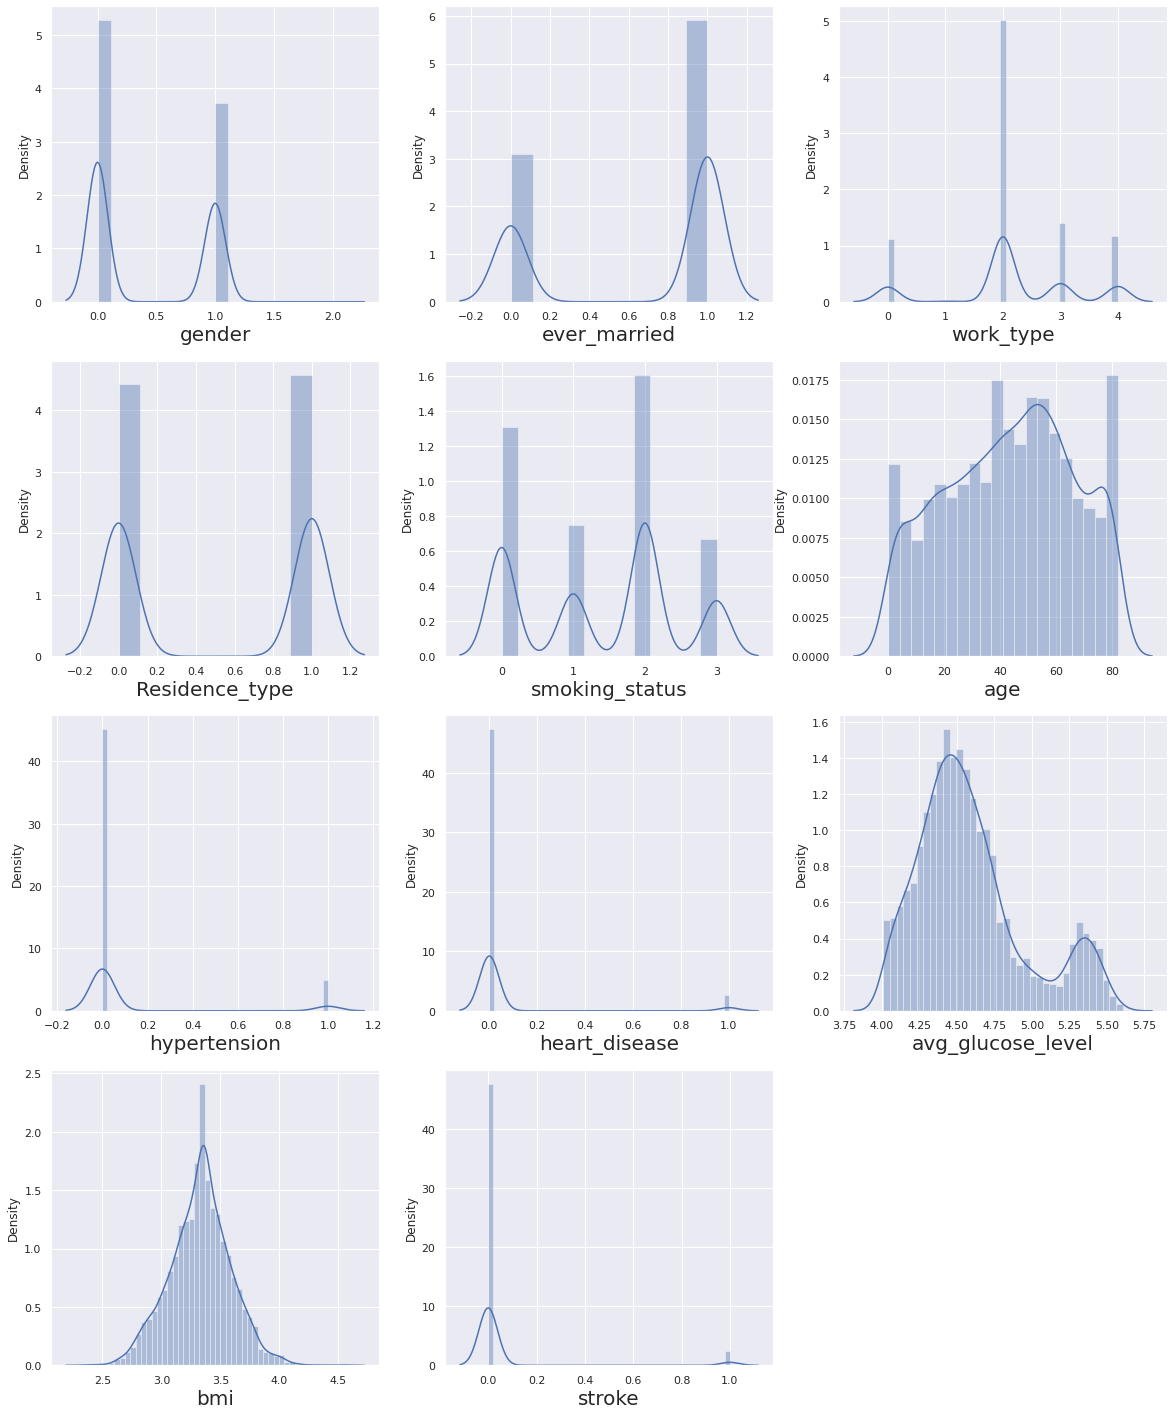

In [47]:
plt.figure(figsize=(20,25))
plotnumber = 1

for column in data:
  if plotnumber <= 15:
    ax = plt.subplot(4,3,plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column,fontsize = 20)
  plotnumber+=1
plt.show()

**Split Independent and Dependent Features**

In [48]:
X = data.drop(columns = ["stroke"],axis = 1)
y = data["stroke"] 

In [49]:
X.head()

,gender,ever_married,work_type,Residence_type,smoking_status,age,hypertension,heart_disease,avg_glucose_level,bmi
0,1,1,2,1,1,67.0,0,1,5.432367,3.600048
1,0,1,3,0,2,61.0,0,0,5.309307,3.363608
2,1,1,2,0,2,80.0,0,1,4.662684,3.481240
3,0,1,2,1,3,49.0,0,0,5.143008,3.538057
4,0,1,3,0,2,79.0,1,0,5.159745,3.178054


In [50]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

**Feature Scaling**

In [51]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [52]:
X_scaled

array([[ 1.18807255,  0.72388421, -0.15383636, ...,  4.18503199,
         2.32049415,  1.03994291],
       [-0.840344  ,  0.72388421,  0.76343762, ..., -0.2389468 ,
         1.98050038,  0.13007302],
       [ 1.18807255,  0.72388421, -0.15383636, ...,  4.18503199,
         0.19400123,  0.58274597],
       ...,
       [-0.840344  ,  0.72388421,  0.76343762, ..., -0.2389468 ,
        -0.48002622,  0.35093039],
       [ 1.18807255,  0.72388421, -0.15383636, ..., -0.2389468 ,
         1.44016685, -0.33561707],
       [-0.840344  ,  0.72388421, -1.98838433, ..., -0.2389468 ,
        -0.40482282, -0.24646571]])

**Vif**

In [53]:
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

In [54]:
vif

,VIF,Features
0,1.017491,gender
1,1.964922,ever_married
2,1.303299,work_type
3,1.000552,Residence_type
4,1.165677,smoking_status
5,2.230318,age
6,1.108097,hypertension
7,1.107866,heart_disease
8,1.077825,avg_glucose_level
9,1.323226,bmi


Here, we have the correlation values for all the features. As a thumb rule, a VIF value greater than 5 means a very severe multicollinearity. We don't any VIF greater than 5 , so we are good to go.

Great. Let's go ahead and use linear regression and see how good it fits our data. But first. let's split our data in train and test.

**Splitting the data for training and Testing**

In [55]:
#split the data into training and testing

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 10)

In [56]:
print("Shape of X Train: ",X_train.shape)
print("Shape of X Test: ",X_test.shape)
print("Shape of y Train: ",y_train.shape)
print("Shape of y Test: ",y_test.shape)

Shape of X Train:  (4088, 10)
Shape of X Test:  (1022, 10)
Shape of y Train:  (4088,)
Shape of y Test:  (1022,)


**Implementing Algorithms**

In [57]:
def ML_model(model):
  #model = LogisticRegression()
  model.fit(X_train,y_train)

  y_pred = model.predict(X_test)
# print(y_pred)

# Accuracy,F1_Score, Precision_Score,Recall_Score
  print("Confusion Matrix :\n ",(confusion_matrix(y_test,y_pred)))
  print()
  print("Accuracy_Score: ", round(accuracy_score(y_test,y_pred)*100,3),"%")
  print()
  print("F1 Score: ", (f1_score(y_test,y_pred)))
  print("Precision Score: ", (precision_score(y_test,y_pred)))
  print("Recall Score :", (recall_score(y_test,y_pred)))
  print("AUC Score :", roc_auc_score(y_test,y_pred))
  print("\n")
#Entire Report of the Model
  print("Entire Report of the Model: \n", (classification_report(y_test,y_pred)))
  plt.show()

In [58]:
classifier = ML_model(LogisticRegression())
classifier

Confusion Matrix :
  [[960   0]
 [ 62   0]]

Accuracy_Score:  93.933 %

F1 Score:  0.0
Precision Score:  0.0
Recall Score : 0.0
AUC Score : 0.5


Entire Report of the Model: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



In [59]:
ML_model(DecisionTreeClassifier())

Confusion Matrix :
  [[921  39]
 [ 56   6]]

Accuracy_Score:  90.705 %

F1 Score:  0.11214953271028037
Precision Score:  0.13333333333333333
Recall Score : 0.0967741935483871
AUC Score : 0.5280745967741934


Entire Report of the Model: 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       960
           1       0.13      0.10      0.11        62

    accuracy                           0.91      1022
   macro avg       0.54      0.53      0.53      1022
weighted avg       0.89      0.91      0.90      1022



In [60]:
ML_model(RandomForestClassifier())

Confusion Matrix :
  [[957   3]
 [ 62   0]]

Accuracy_Score:  93.64 %

F1 Score:  0.0
Precision Score:  0.0
Recall Score : 0.0
AUC Score : 0.4984375


Entire Report of the Model: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



**Save the Modle**

In [61]:
# Save the Model
import pickle
# saving the model to the local file system
filename = 'finalized_model.pickle'
pickle.dump(classifier, open(filename, 'wb'))

**References:-**

1. (ANN Implementation)--> https://www.kaggle.com/code/amartyabhattacharya/stroke-dataset-eda-prediction-model-performances/notebook 